## Fashion_MNIST dataset introduction 

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Here's an example how the data looks (each class takes three-rows):

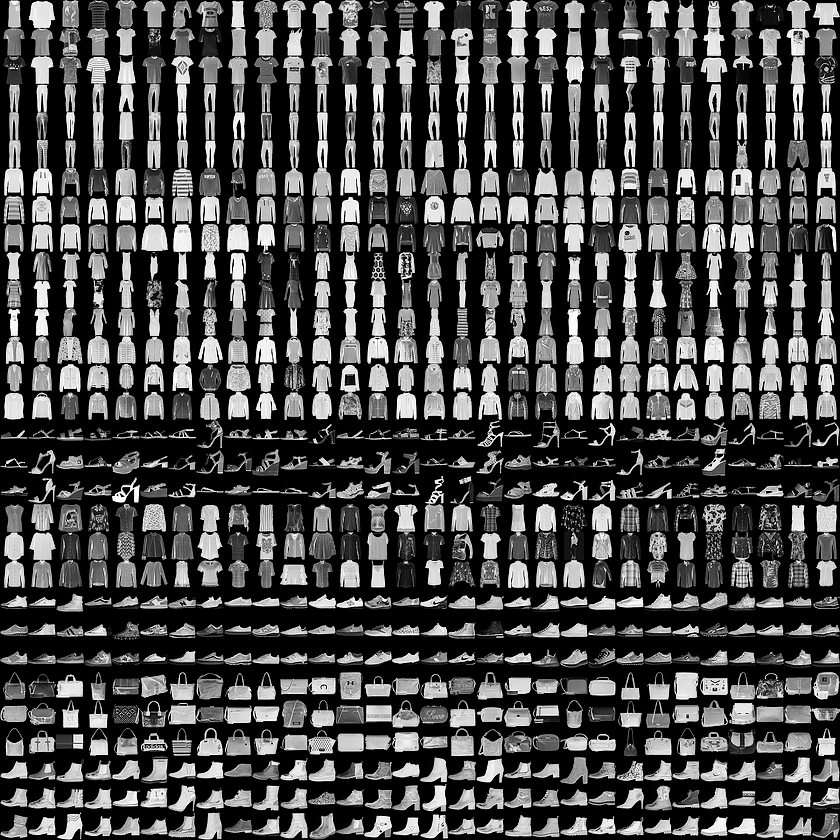

In [1]:
from IPython.display import Image
Image(filename='/Users/julitastraszak/Downloads/fashion-mnist-sprite.png')

After importing the datasets we can visualise it using UMAP script. UMAP is the dimension reduction technique for data visualisation that is much faster than previously available techiniques. The Fashion MNIST embedded via UMAP shows the multidimensional space mapped into 2D with certain clusters closer or further apart. 

In [18]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
import umap 

%matplotlib inline
%config InlineBackend.figure_format='retina'

from tensorflow.examples.tutorials.mnist import input_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from xgboost import XGBClassifier

In [19]:
# Import Fashion MNIST data with one-hot encoding
dir_fashion = '/Users/julitastraszak/Documents/GitHub/fashion-mnist/data/fashion/'
fashion_mnist = input_data.read_data_sets(dir_fashion, one_hot=True)

Extracting /Users/julitastraszak/Documents/GitHub/fashion-mnist/data/fashion/train-images-idx3-ubyte.gz
Extracting /Users/julitastraszak/Documents/GitHub/fashion-mnist/data/fashion/train-labels-idx1-ubyte.gz
Extracting /Users/julitastraszak/Documents/GitHub/fashion-mnist/data/fashion/t10k-images-idx3-ubyte.gz
Extracting /Users/julitastraszak/Documents/GitHub/fashion-mnist/data/fashion/t10k-labels-idx1-ubyte.gz


In [4]:
# Dictionary of labels
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

y = 3 (Dress)


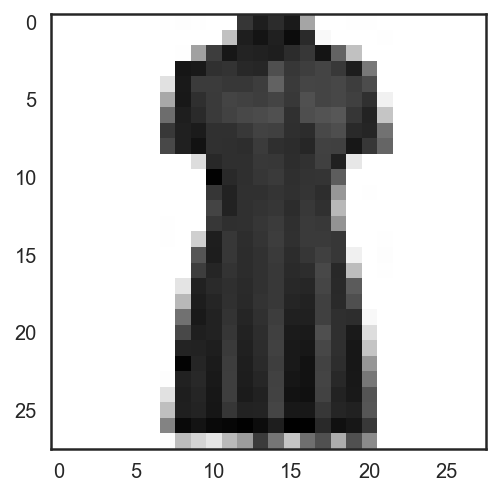

In [5]:
sns.set(style='white', rc={'figure.figsize':(6,4)})
# Get random images and associated label
sample_1 = fashion_mnist.train.images[47].reshape(28,28)
sample_label_1 = np.where(fashion_mnist.train.labels[47] == 1)[0][0]

# Show images and labels
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')
plt.show()


In [6]:
train = fashion_mnist.train
test = fashion_mnist.test

In [7]:
train_labels = []

for i in range (train.labels.shape[0]):
    classi = np.where(fashion_mnist.train.labels[i] == 1)[0][0]
    train_labels.append(classi)
test_labels= []
for i in range (test.labels.shape[0]):
    classi = np.where(fashion_mnist.train.labels[i] == 1)[0][0]
    test_labels.append(classi)

In [8]:
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

data = np.array(np.vstack([train.images, test.images]), dtype=np.float64) / 255.0
target = np.array(np.hstack([train_labels, test_labels]))

In [9]:
%%time
embedding = umap.UMAP(n_neighbors=5, metric='euclidean', random_state=42).fit_transform(data)

CPU times: user 1min 30s, sys: 6.84 s, total: 1min 37s
Wall time: 1min 24s


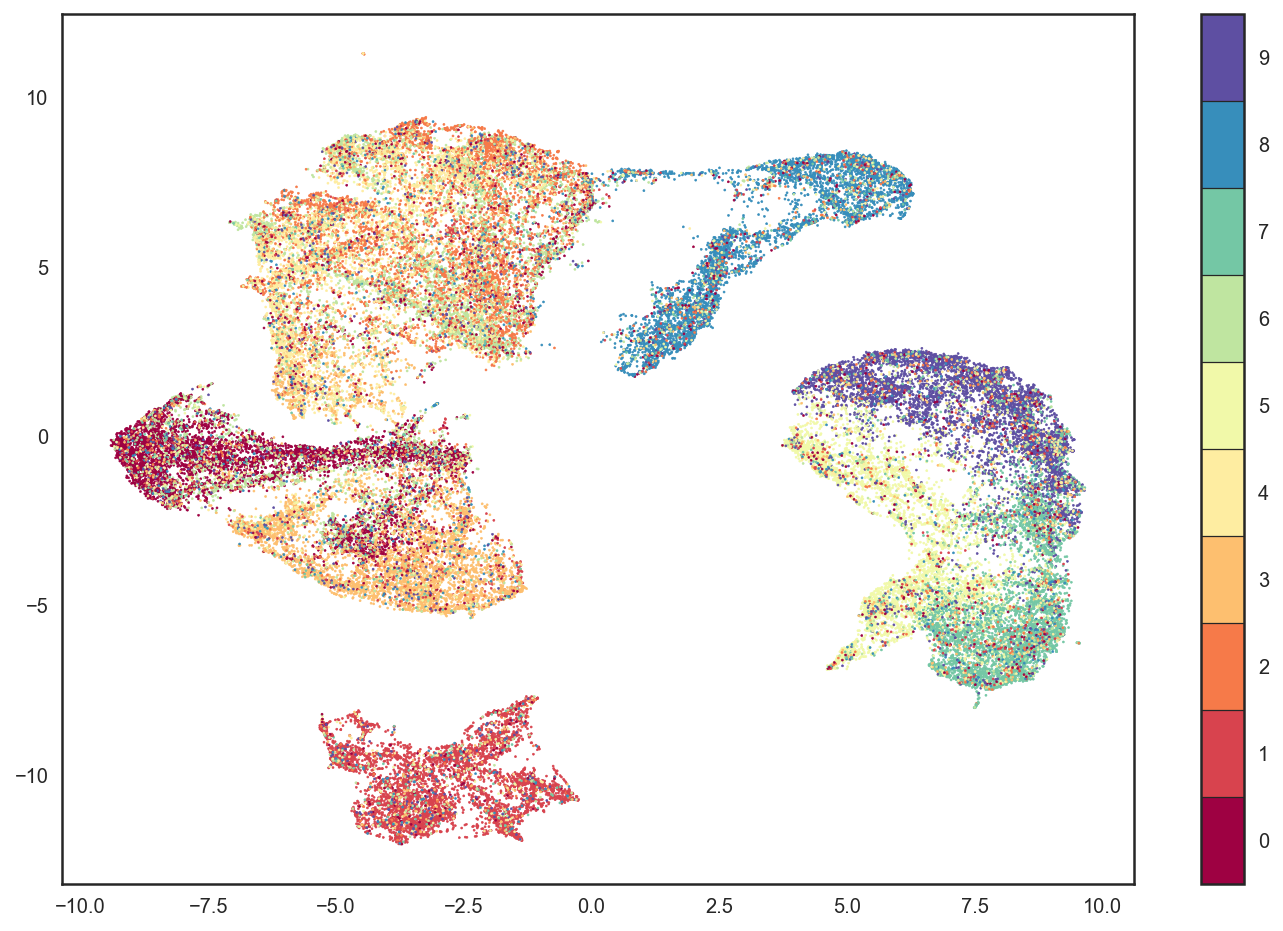

In [10]:
plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap="Spectral", s=1)
cbar = plt.colorbar(values=np.arange(10) , boundaries=np.arange(11)-0.5, ticks=np.arange(10), drawedges=True)

## Comparision of machine learning models 

This classified dataset can be trained through various machine learning models and compared according their accuracy, running speed and deviation. 

In [11]:
# Load in the python file as a module
my_file = '/Users/julitastraszak/Documents/GitHub/fashion-mnist/utils/mnist_reader.py'
import importlib.util
spec = importlib.util.spec_from_file_location("mnist_reader", my_file)
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

In [12]:
x_train = foo.load_mnist(dir_fashion, kind='train')
x_test = foo.load_mnist(dir_fashion, kind='t10k')

### Random Forest

In [13]:
%%time
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50, criterion='entropy')
rnd_clf.fit(x_train[0], x_train[1])

CPU times: user 1min 23s, sys: 378 ms, total: 1min 24s
Wall time: 1min 24s


In [14]:
y_pred_rf = rnd_clf.predict(x_test[0])
accuracy_score(y_pred_rf, x_test[1])

0.8763

### Extra Tree 

In [15]:
%%time
clf = ExtraTreesClassifier(n_estimators=50, max_depth=None,
...     min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x_train[0], x_train[1])
scores.mean()

CPU times: user 40.6 s, sys: 742 ms, total: 41.3 s
Wall time: 40.7 s


In [16]:
scores = cross_val_score(clf, x_train[0], x_train[1])
scores.mean()

0.8761833333333334

### XGBoost 

In [20]:
%%time
# fit model no training data
model = XGBClassifier()
model.fit(x_train[0], x_train[1])

CPU times: user 31min 12s, sys: 11.8 s, total: 31min 24s
Wall time: 31min 55s


In [21]:
# make predictions for test data
y_pred = model.predict(x_test[0])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(x_test[1], predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.82%


//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Support Vector Machine 

In [22]:
%%time
# Create SVM classification object 
model = svm.SVC(kernel='poly', gamma=1) 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train[0], x_train[1])
model.score(x_train[0], x_train[1])

CPU times: user 18min 2s, sys: 5.33 s, total: 18min 7s
Wall time: 20min 6s


In [23]:
#Predict Output
predicted= model.predict(x_test[0])
accuracy = accuracy_score(x_test[1], predicted)
print (accuracy)

0.8723


Dropped Gradient Boosting Classifier - results were poor and running time high. 

CNN model in the seperate notebook as it has it build from basic layers, ReLU and pooling. http://localhost:8889/notebooks/Documents/GitHub/fashion-mnist-nn/CNN%20model.ipynb#